# **Data Analysis Projects: Hourly Bike Sharing Patterns: An In-Depth Data Analysis**
- **Name:** Risma Amaliyah Mahmudah
- **Email:** rismaamaliyah2@gmail.com
- **ID Dicoding:** rismaamaliyah

## **Define Business Questions**

1. What is the pattern of using bike sharing rentals at at different hours of the day?
2. How does bike sharing rental usage compare between casual users and registered users throughout the year?
3. Is there a correlation between air humidity and the number of bike sharing rentals?
4. How does bike sharing rental usage differ in various weather conditions during weekdays and holidays?

## **Import Semua Packages/Library yang Digunakan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

In [ ]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/rismaamaliyah/EDA-Bike-Sharing/main/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


About data:
- instant: record index
- dteday : date
- season : season (1: Springer, 2: Summer, 3: Fall, 4: Winter)
- yr : year (0: 2011, 1: 2012)
- mnth : month (1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users	  
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### **Assessing Data**

In [ ]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# check missing values
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# check duplications
print("Number of duplications: ", df.duplicated().sum())

# check statistical parameters
df.describe()

Number of duplications:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight:

- No missing values
- No duplications
- Incorrect dteday, season, mnth, holiday, weekday, workingday, and weathersit data type


### **Cleaning Data**

In [ ]:
# change data types for some columns
df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df.season.astype('category')
df['mnth'] = df.mnth.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['workingday'] = df.workingday.astype('category')
df['weathersit'] = df.weathersit.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Convert the data in the variable category column based on the criteria in readmi.txt**

In [ ]:
# converts the value for the 'season' column: 1: Springer, 2: Summer, 3: Fall, 4: Winter
df.season.replace((1, 2, 3, 4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)

# converts the value for the 'yr' column: 0: 2011, 1: 2012
df.yr.replace((0, 1), (2011, 2012), inplace=True)

# converts the value for the 'mnth' column: 1: January, 2: February, 3: March, 4: April,
# 5: May, 6: June, 7: July, 8: August, 9: September, 10: October, 11: November, 12: December
df.mnth.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
  'October', 'November', 'December'), inplace=True)

# converts the value for the 'holiday' column: 0: No, 1: Yes
df.holiday.replace((0, 1), ('No', 'Yes'), inplace=True)

# converts the value for the 'weekday' column: 0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday
# 4: Thursday, 5: Friday, 6: Saturday
df.weekday.replace((0, 1, 2, 3, 4, 5, 6),
 ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)

# converts the value for the 'workingday' column: 0: No, 1: Yes
df.workingday.replace((0, 1), ('No', 'Yes'), inplace=True)

# converts the value for the 'weathersit' column: 1: Clear, 2: Misty, 3: Light Snow, 4: Heavy Rain
df.weathersit.replace((1, 2, 3, 4), ('Clear', 'Misty', 'Light Snow', 'Heavy Rain'), inplace=True)

<ipython-input-89-e56cc9b8fb85>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.season.replace((1, 2, 3, 4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)
<ipython-input-89-e56cc9b8fb85>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.season.replace((1, 2, 3, 4), ('Springer', 'Summer', 'Fall', 'Win

In [ ]:
# remove unused columns
df = df.drop('instant', axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Springer,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Springer,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Springer,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Springer,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# rename some columns
df.rename(columns={
    'dteday' : 'Date',
    'season' : 'Season',
    'yr' : 'Year',
    'mnth' : 'Month',
    'hr' : 'Hour',
    'holiday' : 'Holiday',
    'weekday' : 'Weekday',
    'workingday' : 'Working Day',
    'weathersit' : 'Weather',
    'temp' : 'Temperature',
    'atemp' : 'Feeling Temperature',
    'hum' : 'Humidity',
    'windspeed' : 'Wind Speed',
    'casual' : 'Casual Count',
    'registered' : 'Registered Count',
    'cnt' : 'Total Count'}, inplace=True)

## **Exploratory Data Analysis (EDA)**

In [ ]:
df.sample(5)

,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual Count,Registered Count,Total Count
6701,2011-10-11,Winter,2011,October,19,No,Tuesday,Yes,Misty,0.58,0.5455,0.83,0.2239,33,285,318
13205,2012-07-09,Fall,2012,July,10,No,Monday,Yes,Misty,0.66,0.6061,0.83,0.1940,58,117,175
13996,2012-08-11,Fall,2012,August,9,No,Saturday,No,Clear,0.68,0.6364,0.79,0.1940,54,217,271
16893,2012-12-11,Winter,2012,December,16,No,Tuesday,Yes,Misty,0.38,0.3939,0.50,0.2239,24,334,358
11111,2012-04-13,Summer,2012,April,4,No,Friday,Yes,Misty,0.34,0.3333,0.53,0.1343,1,4,5


In [ ]:
df.describe(include='all')

,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual Count,Registered Count,Total Count
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


From the results above, the most recorded hourly bike sharing rental data is Fall, May, Saturday, and Clear Weather.

In [ ]:
df.groupby('Year')['Total Count'].agg(['sum', 'mean', 'max', 'min'])

,sum,mean,max,min
Year,,,,
2011,1243103,143.794448,651,1
2012,2049576,234.666361,977,1


From the above results, it can be seen that in 2012 it had the highest total number of hourly bike sharing rental users with the number of users 2049576.

In [ ]:
df.groupby('Month')['Total Count'].agg(['sum', 'mean', 'max', 'min'])

<ipython-input-95-6634df292ad3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Month')['Total Count'].agg(['sum', 'mean', 'max', 'min'])


,sum,mean,max,min
Month,,,,
January,134933,94.424773,559,1
February,151352,112.865026,610,1
March,228920,155.410726,957,1
April,269094,187.260960,822,1
May,331686,222.907258,873,1
June,346342,240.515278,900,1
July,344948,231.819892,913,1
August,351194,238.097627,941,1
September,345991,240.773138,977,1


From the results above, it can be seen that in August it had the highest total number of hourly bike sharing rental users with the number of users 351194, and the most users in September with an average of 240 users.

In [ ]:
df.groupby('Hour')['Total Count'].agg(['sum', 'mean', 'max', 'min'])

,sum,mean,max,min
Hour,,,,
0,39130,53.898072,283,2
1,24164,33.375691,168,1
2,16352,22.869930,132,1
3,8174,11.727403,79,1
4,4428,6.352941,28,1
5,14261,19.889819,66,1
6,55132,76.044138,213,1
7,154171,212.064649,596,1
8,261001,359.011004,839,5


From the results above, it can be seen that at 17 hour there is a total number and average of the most hourly bike sharing rental users with the number of users 336860 and the average number of users 461.

In [ ]:
df.groupby(['Weekday', 'Working Day'])['Total Count'].agg(['sum', 'mean'])

<ipython-input-97-7bb3efc6d50b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Weekday', 'Working Day'])['Total Count'].agg(['sum', 'mean'])


sum        mean
Weekday   Working Day                    
Sunday    No           444027  177.468825
          Yes               0         NaN
Monday    No            59605  166.960784
          Yes          395898  186.568332
Tuesday   No             1013   44.043478
          Yes          468096  192.632099
Wednesday No             7403  308.458333
          Yes          465645  189.981640
Thursday  No             3920   81.666667
          Yes          481475  198.710277
Friday    No             6494  135.291667
          Yes          481296  197.333333
Saturday  No           477807  190.209793
          Yes               0         NaN

From the results above, it was found that the total number of hourly bike sharing rental users was the highest on Thursday and on working days with a total number of users 481296, for the average total hourly bike sharing rental users was the highest on Wednesday and not on working days with an average total number of users 308.

In [ ]:
df.groupby('Season')['Total Count'].agg(['sum', 'mean', 'max', 'min'])

<ipython-input-98-2dbff628a666>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Season')['Total Count'].agg(['sum', 'mean', 'max', 'min'])


,sum,mean,max,min
Season,,,,
Springer,471348,111.114569,801,1
Summer,918589,208.344069,957,1
Fall,1061129,236.016237,977,1
Winter,841613,198.868856,967,1


From the results above, it can be seen that the total and average total number of hourly bike sharing rental users is the highest in the Fall season with a total number of users of 1061129 and an average total of 236.

In [ ]:
df.groupby('Weather')['Total Count'].agg(['sum', 'mean'])

<ipython-input-99-ab03ee10da3b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Weather')['Total Count'].agg(['sum', 'mean'])


,sum,mean
Weather,,
Clear,2338173,204.869272
Misty,795952,175.165493
Light Snow,158331,111.579281
Heavy Rain,223,74.333333


From the results above, it can be seen that the total and average total number of hourly bike sharing rental users is the highest during Clear weather with a total number of users of 2338173 and an average total of 204.

                         Year      Hour  Temperature  Feeling Temperature  \
Year                 1.000000 -0.003867     0.040913             0.039222   
Hour                -0.003867  1.000000     0.137603             0.133750   
Temperature          0.040913  0.137603     1.000000             0.987672   
Feeling Temperature  0.039222  0.133750     0.987672             1.000000   
Humidity            -0.083546 -0.276498    -0.069881            -0.051918   
Wind Speed          -0.008740  0.137252    -0.023125            -0.062336   
Casual Count         0.142779  0.301202     0.459616             0.454080   
Registered Count     0.253684  0.374141     0.335361             0.332559   
Total Count          0.250495  0.394071     0.404772             0.400929   

                     Humidity  Wind Speed  Casual Count  Registered Count  \
Year                -0.083546   -0.008740      0.142779          0.253684   
Hour                -0.276498    0.137252      0.301202          0.374141  

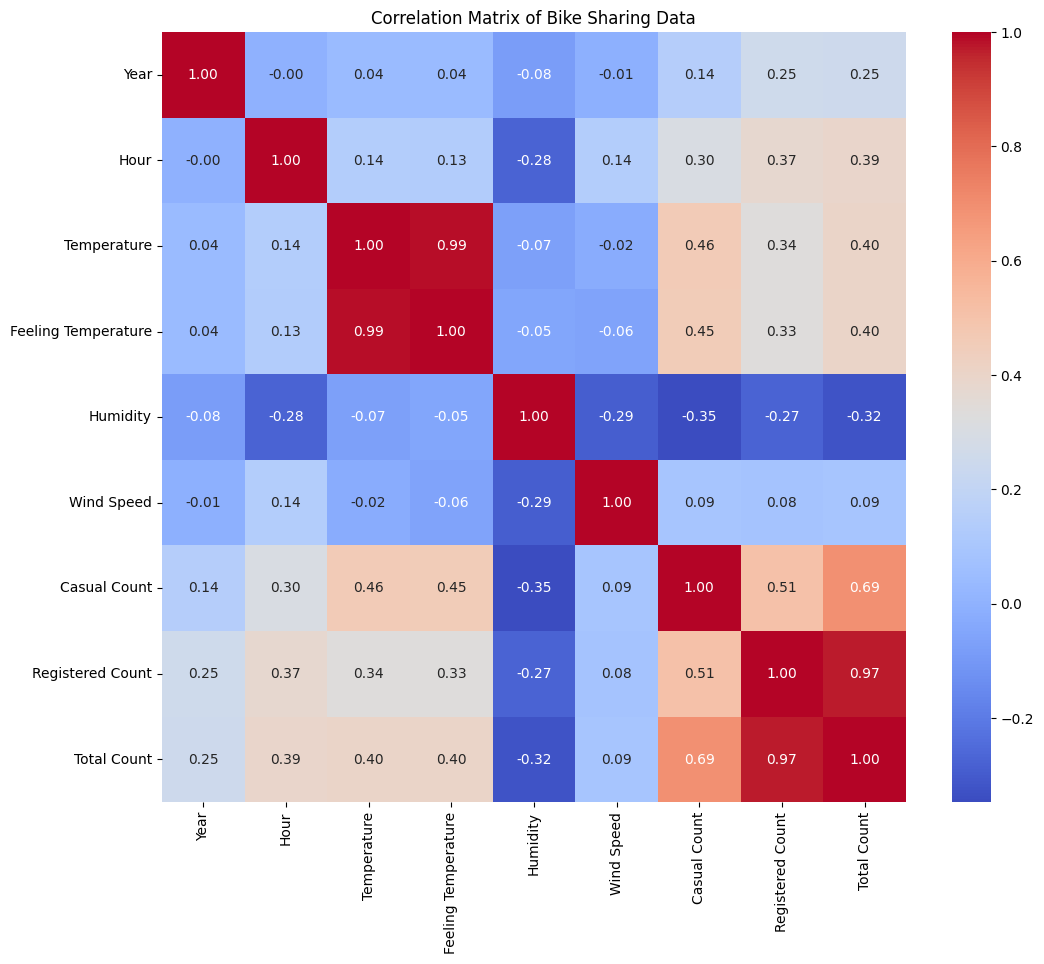

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Displaying a correlation matrix
print(correlation_matrix)

# Correlation matrix visualization with heatmaps
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bike Sharing Data')
plt.show()

- Temperature and Feeling Temperature: As expected, temperature and feeling temperature are almost identical in their variations.
- Total Count and Registered Count: Registered users are the primary contributors to the total bike rentals.
- Total Count and Casual Count: Casual users also significantly contribute to the total bike rentals, though less than registered users.
- Hour and Total Count: The time of day moderately affects the number of bike rentals, aligning with daily commute patterns.
- Humidity and Total Count: Higher humidity is associated with a decrease in bike rentals.
- Wind Speed and Total Count: Wind speed has a minimal impact on bike rentals.

## **Visualization & Explanatory Analysis**

### **Question 1: What is the pattern of using bike sharing rentals at at different hours of the day?**

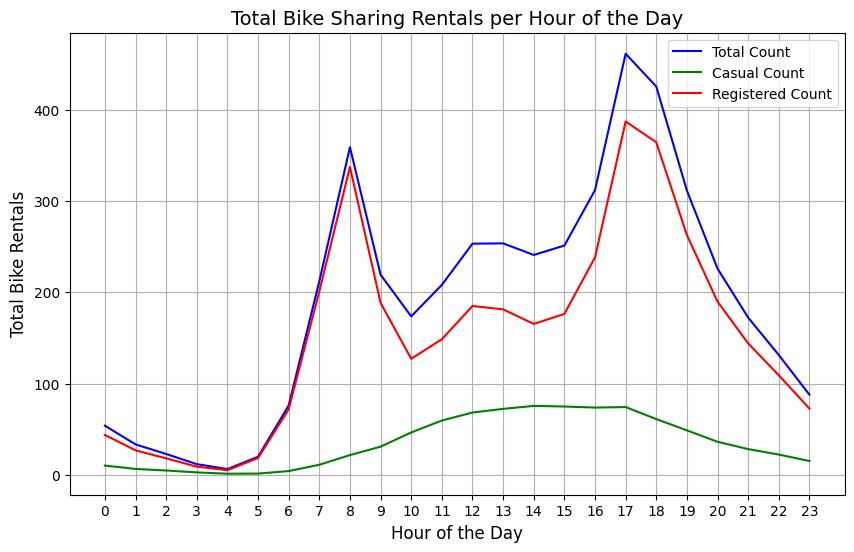

In [ ]:
# Group by 'Hour' to calculate the sum of total rentals for each hour
hourly_data = df.groupby('Hour')[['Casual Count', 'Registered Count', 'Total Count']].mean().reset_index()

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a line plot to visualize bike usage per hour
sns.lineplot(x='Hour', y='Total Count', data=hourly_data, label='Total Count', color='b')
sns.lineplot(x='Hour', y='Casual Count', data=hourly_data, label='Casual Count', color='g')
sns.lineplot(x='Hour', y='Registered Count', data=hourly_data, label='Registered Count', color='r')

# Add title and labels
plt.title('Total Bike Sharing Rentals per Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)

# Show the plot
plt.xticks(range(0, 24))  # Ensure all hours are labeled
plt.grid(True)
plt.show()

- **Morning Peak (8 AM)**: There's a significant increase in total rentals and registered rentals, indicating that many people are using the bike-sharing service for their morning commute.
- **Afternoon Peak (2 PM)**: Casual rentals peak around this time, suggesting that people are using the bikes for leisure or short trips during their lunch break or midday activities.
- **Evening Peak (5-6 PM)**: Another sharp increase in total rentals and registered rentals, likely due to people using the bikes to get home from work or school.

Overall, the pattern shows higher usage during typical commute hours (morning and evening) by registered users, while casual users have a more steady usage throughout the day with a slight peak in the afternoon.

### **Question 2: How does bike sharing rental usage compare between casual users and registered users throughout the year?**

<ipython-input-102-75e53484c462>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_usage = df.groupby('Month')[['Casual Count', 'Registered Count']].sum()


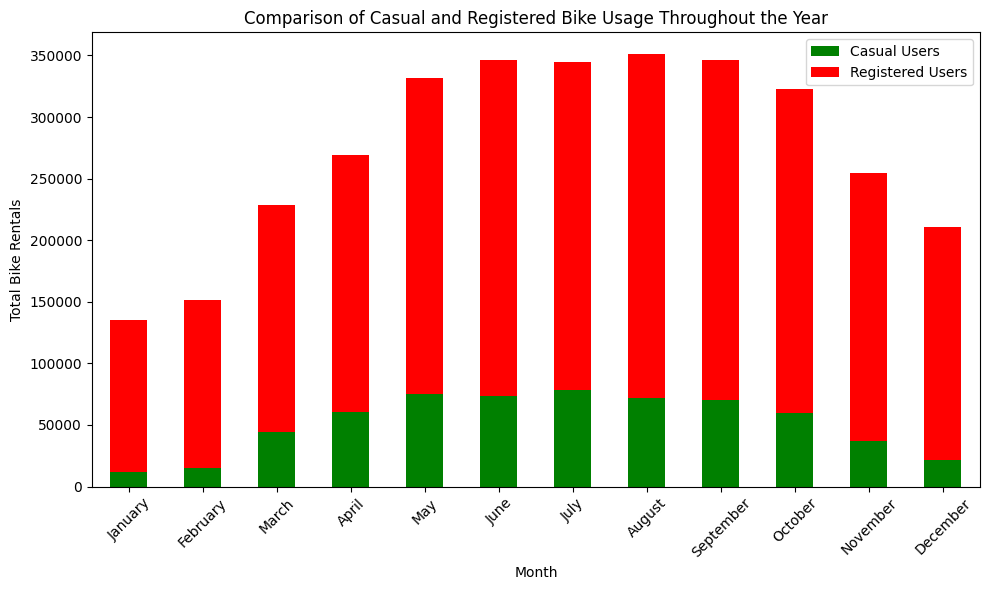

In [ ]:
# Grouping data by 'Month' and calculating total for 'Casual Count' and 'Registered Count'
monthly_usage = df.groupby('Month')[['Casual Count', 'Registered Count']].sum()

# Setting up the figure and axes for the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the stacked bar chart
monthly_usage.plot(kind='bar', stacked=True, ax=ax, color=['g','r'])

# Adding labels and title
ax.set_title('Comparison of Casual and Registered Bike Usage Throughout the Year')
ax.set_xlabel('Month')
ax.set_ylabel('Total Bike Rentals')
ax.legend(['Casual Users', 'Registered Users'])

# Show the plot
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

- **Usage Patterns**: Registered users consistensyly have higher bike rental usage compared to casual users across all months. This suggests that registered users rely on the bike-sharing service more regularly.
- **Seasonal Trends**: Both user groups show increased activity during the summer months (June, July, August), with a peak in usage. This is likely due to more favorable weather conditions.
- **Winter Drop**: The lowest usage is observed in the winter months (January, February, December), which might be due to less favorable weather for biking.
- **Difference in Peaks**: The increase in rentals for registered users in more pronounced compared to casual users during peak months, indicating that registered users might use the servuce more for routine activities like commuting.

### **Question 3: Is there a correlation between air humidity and the number of bike sharing rentals?**

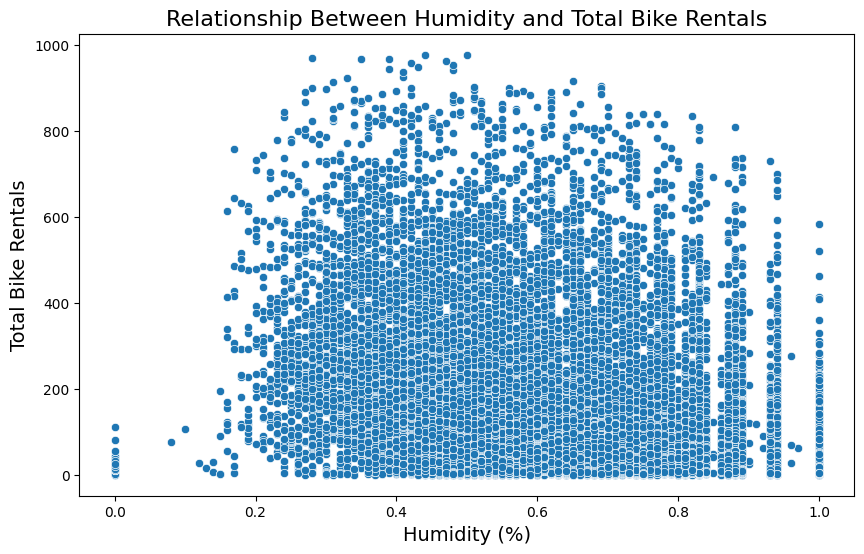

In [ ]:
# Set the plot size for better visibility
plt.figure(figsize=(10, 6))

# Create the scatter plot using seaborn
sns.scatterplot(x='Humidity', y='Total Count', data=df)

# Add labels and title
plt.title('Relationship Between Humidity and Total Bike Rentals', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Total Bike Rentals', fontsize=14)

# Show the plot
plt.show()

- **Moderate Humidity Levels**: Rentals are generally higher when the humidity is between 0.2 and 0.8. It seems a dense cluster of points in this range, indicating more rentals.
- **Extreme Humidity Levels**: Rentals drop when humidity is very low (close to 0.0) or very high (close to 1.0). This suggest that people are less likely to rent bikes in extreme humidity conditions.

Overall, the charts suggests a relationship where moderate humidity levels correlate with higher bike rentals.

### **Question 4: How does bike sharing rental usage differ in various weather conditions during weekdays and holidays?**

<ipython-input-104-201db745bea7>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Total Count', index='Weather', columns='Working Day', aggfunc='sum')


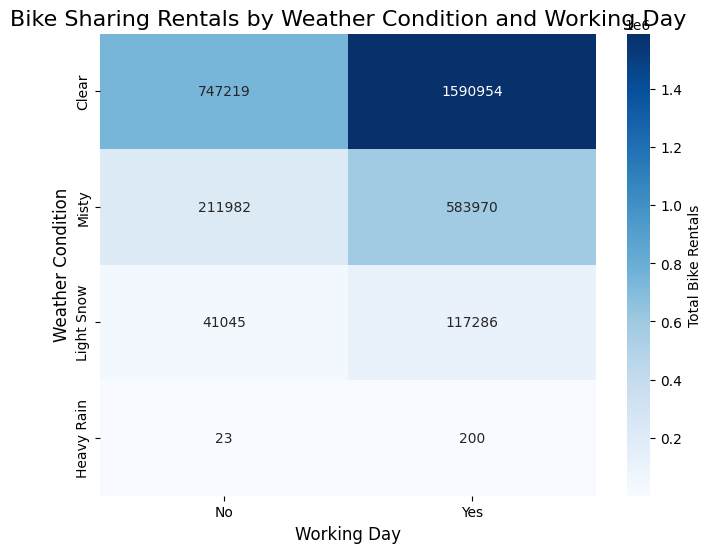

In [ ]:
# Create a pivot table to summarize total bike rentals by Weather and Working Day
pivot_table = df.pivot_table(values='Total Count', index='Weather', columns='Working Day', aggfunc='sum')

# Set figure size
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Total Bike Rentals'})

# Add title and labels
plt.title('Bike Sharing Rentals by Weather Condition and Working Day', fontsize=16)
plt.xlabel('Working Day', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)

# Show the heatmap
plt.show()

- Bike rentals are highest during clear weather and working days.
- Rentals decrease as weather conditions worsen, with the lowest during heavy rain.
- Working days consistently see higher rentals compared to non-working days across all weather conditions.

## **Clustering (Binning)**

In [ ]:
# Binning of Temperature, Humidity, Wind Speed, Hour, and Total Count columns
df['Temperature Binned'] = pd.cut(df['Temperature'], bins=4, labels=['Cold', 'Mild', 'Warm', 'Hot'])
df['Humidity Binned'] = pd.qcut(df['Humidity'], q=3, labels=['Low Humidity', 'Moderate Humidity', 'High Humidity'])
df['Wind Speed Binned'] = pd.qcut(df['Wind Speed'], q=3, labels=['Calm', 'Breezy', 'Windy'])
df['Hour Binned'] = pd.cut(df['Hour'], bins=4, labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df['Rentals Binned'] = pd.cut(df['Total Count'], bins=3, labels=['Low', 'Medium', 'High'])

In [ ]:
# Binning distribution
print(df['Temperature Binned'].value_counts(), '\n')
print(df['Humidity Binned'].value_counts(), '\n')
print(df['Wind Speed Binned'].value_counts(), '\n')
print(df['Hour Binned'].value_counts(), '\n')
print(df['Rentals Binned'].value_counts(), '\n')

Temperature Binned
Warm    6920
Mild    6288
Cold    2572
Hot     1599
Name: count, dtype: int64 

Humidity Binned
Low Humidity         6003
High Humidity        5758
Moderate Humidity    5618
Name: count, dtype: int64 

Wind Speed Binned
Calm      6960
Windy     5554
Breezy    4865
Name: count, dtype: int64 

Hour Binned
Afternoon    4375
Evening      4368
Morning      4360
Night        4276
Name: count, dtype: int64 

Rentals Binned
Low       13990
Medium     2919
High        470
Name: count, dtype: int64 



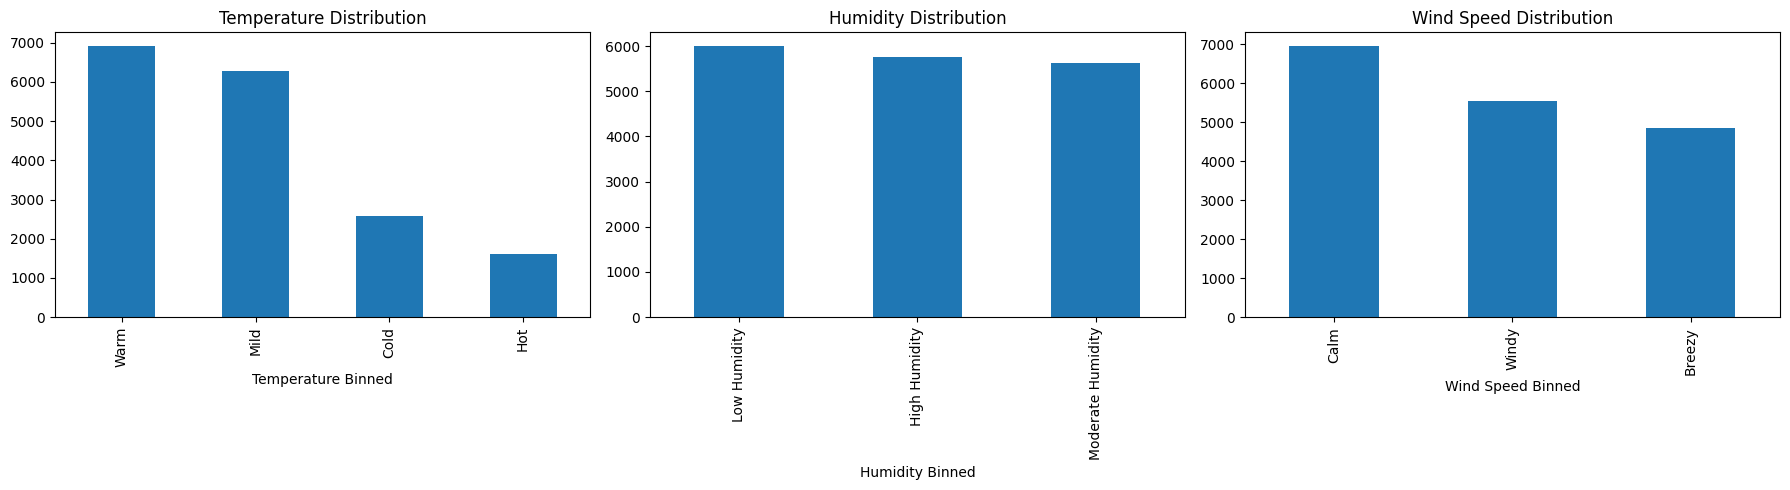

In [ ]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the figsize as needed

# Plot for Temperature Distribution
df['Temperature Binned'].value_counts().plot(kind='bar', ax=axes[0], title='Temperature Distribution')

# Plot for Humidity Distribution
df['Humidity Binned'].value_counts().plot(kind='bar', ax=axes[1], title='Humidity Distribution')

# Plot for Wind Speed Distribution
df['Wind Speed Binned'].value_counts().plot(kind='bar', ax=axes[2], title='Wind Speed Distribution')

# Showing plot
plt.tight_layout()  # For avoid overlapping between charts
plt.show()

- **Temperature**: Warm and mild temperatures are most favorable for bike rentals, while extreme temperatures (cold and hot) see fewer rentals.
- **Humidity**: Rentals are fairly consistent across low, moderate, and high humidity, suggesting less sensitivity to humidity variations.
- **Wind Speed**: Calm conditions are most preferred, with rentals decreasing as wind speed increases.

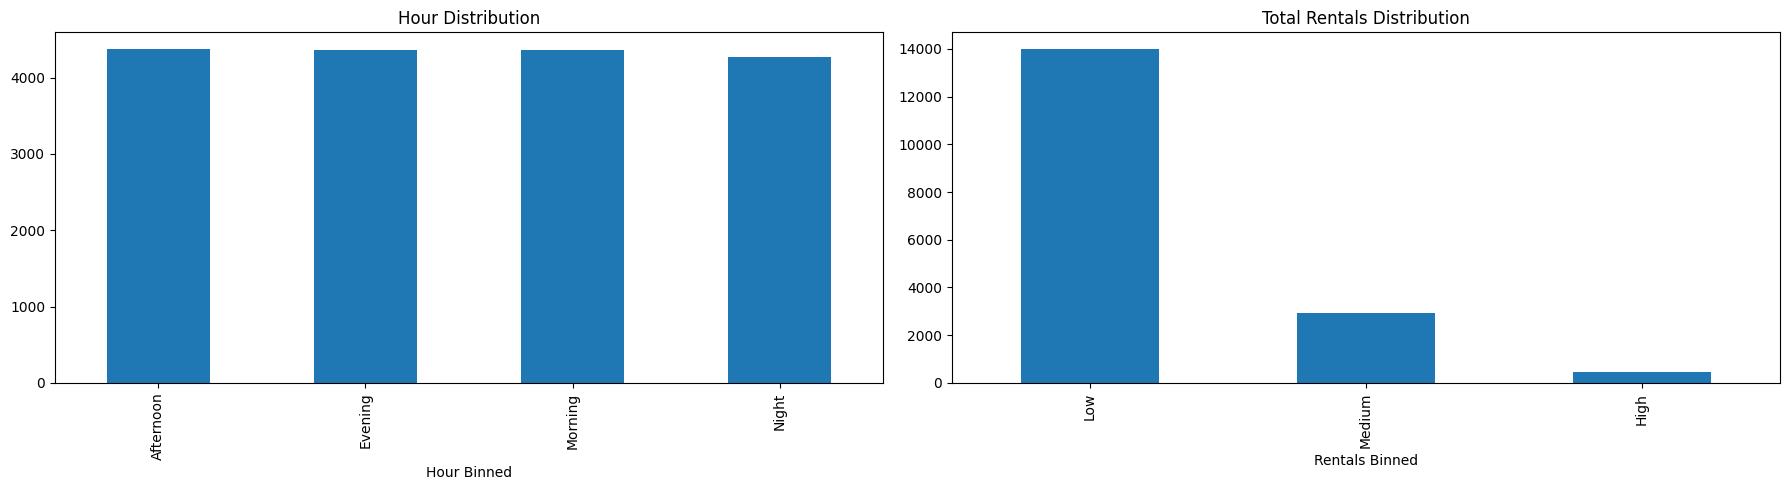

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot for Hour Distribution
df['Hour Binned'].value_counts().plot(kind='bar', ax=axes[0], title='Hour Distribution')

# Plot for Rentals Distribution
df['Rentals Binned'].value_counts().plot(kind='bar', ax=axes[1], title='Total Rentals Distribution')

plt.tight_layout()  # For avoid overlapping between charts
plt.show()

- **Hour**: Indicates a balanced frequency of bike rentals across all times of the day.
- **Total Rentals**: Shows that bike rentals are predominantly low, with medium and high rentals being significantly less frequent.

In [ ]:
# See the relationship between Hour Binned and Binned Rentals
pivot = pd.crosstab(df['Hour Binned'], df['Rentals Binned'])
print(pivot, '\n')

# Seeing the relationship between Temperature and Rentals
pivot_temp = pd.crosstab(df['Temperature Binned'], df['Rentals Binned'])
print(pivot_temp, '\n')

Rentals Binned   Low  Medium  High
Hour Binned                       
Night           4276       0     0
Morning         3473     768   119
Afternoon       2867    1292   216
Evening         3374     859   135 

Rentals Binned       Low  Medium  High
Temperature Binned                    
Cold                2502      63     7
Mild                5526     705    57
Warm                5046    1568   306
Hot                  916     583   100 



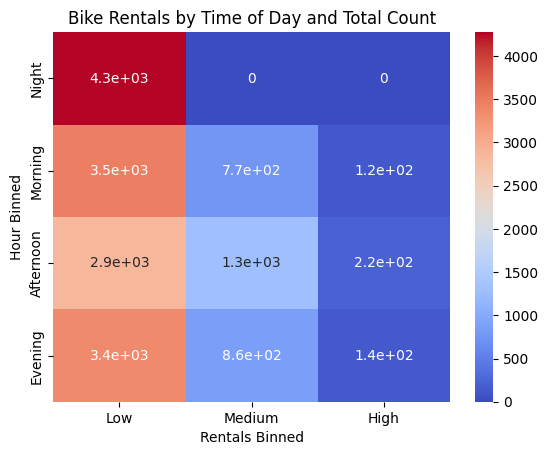

In [ ]:
# Visualization of the relationship between time and rental with heatmaps
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Bike Rentals by Time of Day and Total Count')
plt.show()

- **Low Rentals**: Predominantly hight throughout the day, especially at night.
- **Medium Rentals**: Increase from morning to afternoon, then slightly decrease in the evening.
- **High Rentals**: Lowest at night, gradual increase from morning to afternoon, slight decrease in the evening.

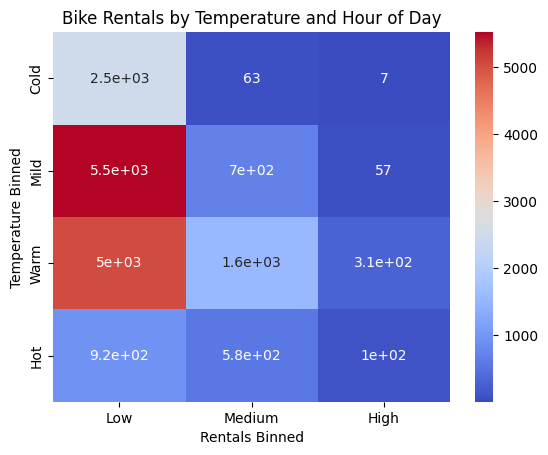

In [ ]:
# Visualization of the relationship between temperature and rental with heatmaps
sns.heatmap(pivot_temp, annot=True, cmap='coolwarm')
plt.title('Bike Rentals by Temperature and Hour of Day')
plt.show()

The chart indicates that bike rentals are highest in mild and warm temperatures, particularly in the low and medium categories. Cold temperatures have the highest number of low rentals but very few medium and high rentals. Hot temperatures show a decrease in rentals compared to mild and warm temperatures, with most rentals still in the low category. This suggest the moderate temperatures (mild and warm) are more favorable for bike rentals.

In [ ]:
# Grouping by Temperature, Humidity, and Wind Speed
group = df.groupby(['Temperature Binned', 'Humidity Binned', 'Wind Speed Binned'])['Total Count'].mean()
print(group)

Temperature Binned  Humidity Binned    Wind Speed Binned
Cold                Low Humidity       Calm                  73.102564
                                       Breezy                78.895652
                                       Windy                 82.620690
                    Moderate Humidity  Calm                  68.302483
                                       Breezy                81.364964
                                       Windy                 96.071823
                    High Humidity      Calm                  65.897655
                                       Breezy                59.823129
                                       Windy                 52.121429
Mild                Low Humidity       Calm                 206.064449
                                       Breezy               210.396907
                                       Windy                191.912969
                    Moderate Humidity  Calm                 148.687898
                    

<ipython-input-112-d5c4b7de51d5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df.groupby(['Temperature Binned', 'Humidity Binned', 'Wind Speed Binned'])['Total Count'].mean()


<ipython-input-113-18fcb8227c42>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_group = df.pivot_table(index='Temperature Binned', columns='Humidity Binned', values='Total Count', aggfunc='mean')


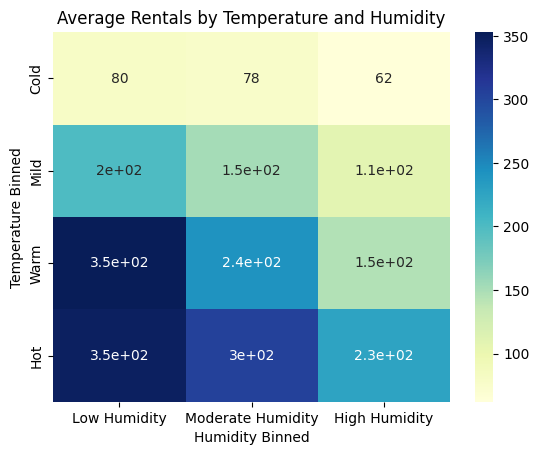

In [ ]:
# Turning into a pivot table for visualization
pivot_group = df.pivot_table(index='Temperature Binned', columns='Humidity Binned', values='Total Count', aggfunc='mean')
sns.heatmap(pivot_group, annot=True, cmap='YlGnBu')
plt.title('Average Rentals by Temperature and Humidity')
plt.show()

- **Temperature Impact**: Rentals increase with warmer temperatures, peaking in warm and hot conditions.
- **Humidity Impact**: Rentals are highest at low humidity across all temperatures ranges, indicating a preference for drier conditions.

In [ ]:
# Cycling usage profile at specific times and temperatures
cluster_profile = df.groupby(['Hour Binned', 'Temperature Binned']).agg({
    'Total Count': ['mean', 'max', 'min'],
    'Casual Count': 'mean',
    'Registered Count': 'mean'
})
print(cluster_profile)

                               Total Count          Casual Count  \
                                      mean  max min         mean   
Hour Binned Temperature Binned                                     
Night       Cold                 13.015169  165   1     1.285881   
            Mild                 22.837383  283   1     3.615576   
            Warm                 31.887372  207   1     6.669511   
            Hot                  47.196429  150   4    11.517857   
Morning     Cold                120.391355  729   1     6.964953   
            Mild                199.505530  839   1    22.618087   
            Warm                254.638740  838   1    40.329768   
            Hot                 243.193662  679  21    62.489437   
Afternoon   Cold                105.628483  385   3    10.433437   
            Mild                232.274278  837   7    47.248031   
            Warm                360.953277  976  11    97.433859   
            Hot                 352.030682  913 

<ipython-input-114-47ccfe531387>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_profile = df.groupby(['Hour Binned', 'Temperature Binned']).agg({


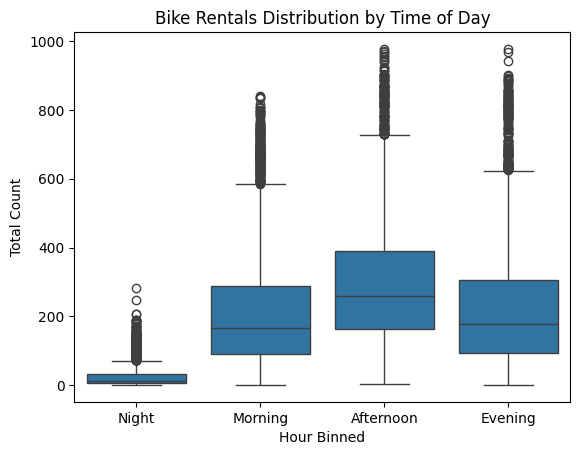

In [ ]:
# Boxplot to see the distribution of rental numbers across each time category
sns.boxplot(x='Hour Binned', y='Total Count', data=df)
plt.title('Bike Rentals Distribution by Time of Day')
plt.show()

- **Night**: Consistently low rentals with minimal variability.
- **Morning, Afternoon, Evening**: Higher and more variable rentals with frequent outliers, indicating peak usage times likely associated with commuting and leisure activities.

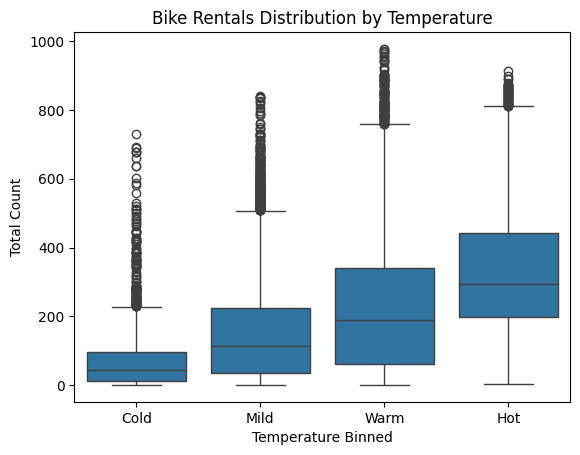

In [ ]:
# Boxplot to see the distribution by temperature
sns.boxplot(x='Temperature Binned', y='Total Count', data=df)
plt.title('Bike Rentals Distribution by Temperature')
plt.show()

- **Temperature Impact**: Rentals increases as temperatures move from cold to warm, peaking in warm conditions.
- **Variability**: Warm and mild temperatureshave the most variability in rentals, indicating a wider range of rental activities.
- **Outliers**: Common across all temperature ranges, showing that while there are general trends, there are still exceptional days with unusually high or low rentals.

In [ ]:
# Create a custom cluster based on binning
df['Cluster'] = df['Temperature Binned'].astype(str) + ' & ' + df['Humidity Binned'].astype(str) + ' & ' + df['Wind Speed Binned'].astype(str)

# View cluster distribution
print(df['Cluster'].value_counts())

Cluster
Warm & High Humidity & Calm          1476
Mild & Low Humidity & Windy          1172
Mild & High Humidity & Calm          1135
Warm & Moderate Humidity & Calm       994
Warm & High Humidity & Breezy         797
Mild & Moderate Humidity & Calm       785
Warm & Low Humidity & Windy           768
Warm & Moderate Humidity & Breezy     752
Warm & Moderate Humidity & Windy      615
Mild & Low Humidity & Breezy          582
Mild & High Humidity & Breezy         556
Mild & Moderate Humidity & Windy      553
Mild & Moderate Humidity & Breezy     533
Warm & High Humidity & Windy          525
Warm & Low Humidity & Calm            500
Cold & Low Humidity & Windy           493
Warm & Low Humidity & Breezy          493
Mild & High Humidity & Windy          491
Mild & Low Humidity & Calm            481
Cold & High Humidity & Calm           469
Hot & Low Humidity & Windy            452
Cold & Moderate Humidity & Calm       443
Hot & Low Humidity & Breezy           330
Hot & Low Humidity & Calm 

In [ ]:
# Further analysis for each cluster
cluster_analysis = df.groupby('Cluster')['Total Count'].mean()

# Displaying results
print(cluster_analysis)

Cluster
Cold & High Humidity & Breezy         59.823129
Cold & High Humidity & Calm           65.897655
Cold & High Humidity & Windy          52.121429
Cold & Low Humidity & Breezy          78.895652
Cold & Low Humidity & Calm            73.102564
Cold & Low Humidity & Windy           82.620690
Cold & Moderate Humidity & Breezy     81.364964
Cold & Moderate Humidity & Calm       68.302483
Cold & Moderate Humidity & Windy      96.071823
Hot & High Humidity & Breezy         315.363636
Hot & High Humidity & Calm           137.125000
Hot & High Humidity & Windy          138.000000
Hot & Low Humidity & Breezy          348.927273
Hot & Low Humidity & Calm            331.511401
Hot & Low Humidity & Windy           359.188053
Hot & Moderate Humidity & Breezy     322.525000
Hot & Moderate Humidity & Calm       231.485030
Hot & Moderate Humidity & Windy      362.124224
Mild & High Humidity & Breezy        115.730216
Mild & High Humidity & Calm          110.598238
Mild & High Humidity & Windy    

In [ ]:
print('\nCluster with the highest average:', cluster_analysis.idxmax())
print('Average total count for this cluster:', cluster_analysis.max())


Cluster with the highest average: Warm & Low Humidity & Breezy
Average total count for this cluster: 370.894523326572


- **Optimal Conditions**: Warm and hot temperatures with low humidity and breezy conditions have the highest rentals.
- **Least Favorable Conditions**: Cold temperatures, especially with high humidity, see the lowest rentals.
- **Wind Factor**: Breezy and windy conditions generally support higher rentals across all temperatures and humidity levels.

## **Conclusion**

**Visualization and Explanatory Analysis**
- **Hourly Bike Rentals**: Highest rentals during 8 AM and 5-6 PM, especially by registered users, indicating usage for commuting.
- **Annual Usage**: Peak usage in summer, drop in winter, with registered users showing more pronounced seasonal patterns.
- **Humidity and Rentals**: Higher rentals in moderate humidity conditions, with a decline in very low or high humidity.
- **Weather and Working Days**: Highest rentals on clear days, more on working days. Lower rentals in adverse weather, with the least during heavy rain.

****
**Cluster Analysis**
- **Optimal Rentals**: Highest rentals occur in warm and hot temperatures with low humidity and breezy conditions.
- **Least Favorable**: Cold temperatures, particularly with high humidity, see the lowest rentals.
- **Temperature and Humidity Balance**: Rentals peak in balanced conditions, particularly mild to warm temperatures with low to moderate humidity.

In [ ]:
df.to_csv("all_data.csv", index=False)